In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold

# for named entity
from nltk import word_tokenize, pos_tag, ne_chunk, tree
%matplotlib inline


# nltk for natural language processing

In [2]:
path =r'./playstorereviewsdata/' # use your path
allFiles = glob.glob(path + "/*.tsv")

# for out_count, file in enumerate(allFiles):
#     with open(file, newline='') as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#         #import pdb;pdb.set_trace()
#         for counter, row in enumerate(spamreader):
#             import pdb;pdb.set_trace()
#             print(row)
            
#     with open(file+out_count, 'wt') as csvfile:
#             writer = csv.writer(csvfile, delimiter='', quotechar='|')
#             #writer.writerow(["#"] + anarkali_characteristics)
#             #import pdb;pdb.set_trace()
#             for element in lehenga_characteristics:
#                 #import pdb;pdb.set_trace()
#                 writer.writerow([element["name"], element["count"]])

In [3]:
# get full data


frame = pd.DataFrame()
list_ = []

# datacolumns = [
#     "Package Name",
#     "App Version Code",
#     "Reviewer Language",
#     "Device",
#     "Review Submit Date and Time",
#     "Review Submit Millis Since Epoch",
#     "Review Last Update Date and Time",
#     "Review Last Update Millis Since Epoch",
#     "Star Rating",
#     "Review Title",
#     "Review Text",
#     "Developer Reply Date and Time",
#     "Developer Reply Millis Since Epoch",
#     "Developer Reply Text,Review Link"
# ]

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, encoding = "ISO-8859-1", error_bad_lines=False, sep='\t')
    list_.append(df)
    
    
full_data = pd.concat(list_)
full_data.head(5)


,App Version Code,App Version Name,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Device,Package Name,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Review Link,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Text,Review Title,Reviewer Language,Star Rating
0,1.0,NaN,NaN,NaN,NaN,m7,com.flyrobe.android,2015-08-09T07:05:36Z,1439103936468,https://play.google.com/apps/publish?dev_acc=0...,2015-08-09T07:05:36Z,1439103936468,This is a brilliant concept. Please start for ...,Great product!,en,5
1,NaN,NaN,NaN,NaN,NaN,falcon_umtsds,com.flyrobe.android,2015-08-09T10:05:06Z,1439114706593,https://play.google.com/apps/publish?dev_acc=0...,2015-08-09T10:05:06Z,1439114706593,Brilliant concept :),NaN,en,5
2,NaN,NaN,NaN,NaN,NaN,k3g,com.flyrobe.android,2015-08-09T11:51:54Z,1439121114161,https://play.google.com/apps/publish?dev_acc=0...,2015-08-09T11:51:54Z,1439121114160,NaN,NaN,en,5
3,1.0,NaN,NaN,NaN,NaN,htc_m8,com.flyrobe.android,2015-08-09T12:03:11Z,1439121791786,https://play.google.com/apps/publish?dev_acc=0...,2015-08-09T12:03:11Z,1439121791786,Brilliant stuff!! Waiting to see more..,NaN,en,5
4,1.0,NaN,NaN,NaN,NaN,titan_umtsds,com.flyrobe.android,2015-08-09T12:12:04Z,1439122324704,https://play.google.com/apps/publish?dev_acc=0...,2015-08-09T12:12:04Z,1439122324704,NaN,NaN,en,5


In [4]:
# remove the NaN 
full_data["Review Text"] = full_data["Review Text"].fillna('')
full_data["Review Title"] = full_data["Review Title"].fillna('')
full_data["App Version Code"] = full_data["App Version Code"].fillna(0.0)
full_data["App Version Name"] = full_data["App Version Name"].fillna('')
full_data["Developer Reply Date and Time"] = full_data["Developer Reply Date and Time"].fillna('')
full_data["Developer Reply Millis Since Epoch"] = full_data["Developer Reply Millis Since Epoch"].fillna('')
full_data["Developer Reply Text"] = full_data["Developer Reply Text"].fillna('')

# slicing the required columns only
full_data = full_data[["Review Text", "Review Title", "Star Rating"]]

In [5]:
full_data.head(5)

,Review Text,Review Title,Star Rating
0,This is a brilliant concept. Please start for ...,Great product!,5
1,Brilliant concept :),,5
2,,,5
3,Brilliant stuff!! Waiting to see more..,,5
4,,,5


In [6]:
full_data = full_data.loc[full_data['Review Text'] != '']
full_data["Positive"] = full_data['Star Rating'] >= 4
full_data["Negative"] = full_data['Star Rating'] <= 3

positive_data = full_data.loc[(full_data['Negative'] == True)][:500]
negative_data = full_data.loc[(full_data['Positive'] == True)][:500]

# add a named entities to look for
#import pdb;pdb.set_trace()

sliced_data = positive_data.append(negative_data)





#sliced_data["Named Entities"] = [ne_chunk(pos_tag(word_tokenize(item))) for item in sliced_data['Review Text'].tolist()] 

In [7]:
input_df = sliced_data[['Review Text', 'Star Rating']]
sliced_data['Review Text']

50           What's the access code???I am stuck there!!
52                                  Stuck in access code
53     Quickly send or give an invite code. Email id ...
135    I'm glad this thing is now available in India ...
162                     how to log in??? access code????
165    What's d use if v can now take access with out...
176    Hiii management... how do I login inn into the...
183                                I'm not able to login
13     I have trouble accessing to d special dresses ...
16         Dsnt install on my phone ð£ please help out
17                          Keeps on throwing error 504.
20     It's not getting installed bcz of this " error...
28     I can't open reserve categories.I really want ...
35     Installed it and it simply gets stuck. Cant se...
92                   Traditiona thing not getting opened
4      The pictures just don't load! I have a 4g conn...
7      I dont have fb account..is there any other opt...
15     No images are loaded.. E

In [8]:
# bring the data with probability tech + , tech - , ops + , ops - , product + , product -
import re
tech_list = ["order", "placed", "tech", "issue", "coupon", "item", "order placed", "coupon issue", "tech issue", "App crash", "web crash", "ios", 
            "android", "signup issue", "signin issue", "order placed", "order confirmation", "online payment", "hang", "too slow"
            , "cart", "image not matching"]
ops_list = ["delivery", "measurement", "pickup", "refund",  "fitting", "trial", "pickup", "refund", "deposit", "on-time", "delay", "address updation", "return", "cancellation", "exchange",
"payment issues"]
product_list = ["content", "available", "error", "loading", "website not loading", "site not loading", "content not available", "cloth tear", "defective product", "discount codes"]

def calculate_token_probability(item):
    tech = 0; ops = 0; product = 0
    tokens = item['Review Text'].split(' ')
#     for element in tokens:
#         #import pdb;pdb.set_trace()
#         try:
#             tech_match = re.findall(element.lower(), tech_str)
#         except Exception:
#             tech_match = None
            
#         try:
#             ops_match = re.findall(element.lower(), ops_str)
#         except Exception:
#             ops_match = None
            
#         try:
#             product_match = re.findall(element.lower(), product_str)
#         except Exception:
#             product_match = None
#         if tech_match:
#             tech += 1
#         elif ops_match:
#             ops += 1
#         elif product_match:
#             product += 1
    tech = [1 for tech_i in tech_list if tech_i.lower() in item['Review Text']]
    ops = [1 for ops_i in ops_list if ops_i.lower() in item['Review Text']]
    product = [1 for product_i in product_list if product_i.lower() in item['Review Text']]
    

#     for tech_i in tech_list:
#         try:
#             tech_match = re.findall(tech_i.lower(), item['Review Text'])
#         except Exception:
#             tech_match = None
            
#         if tech_match:
#              tech += 1
    
#     for ops_i in ops_list:
#         try:
#             ops_match = re.findall(ops_i.lower(), item['Review Text'])
#         except Exception:
#             ops_match = None
            
#         if ops_match:
#              ops += 1
    
#     for product_i in product_list:
#         try:
#             product_match = re.findall(product_i.lower(), item['Review Text'])
#         except Exception:
#             product_match = None
            
#         if product_match:
#              product += 1
            
    tech_sum = sum(tech)
    ops_sum = sum(ops)
    product_sum = sum(product)
    
    sum_all = tech_sum + ops_sum + product_sum
    try:
        return pd.Series({'tech_prob': tech_sum/sum_all, 'ops_prob': ops_sum/sum_all, 'product_prob': product_sum/sum_all})
    except Exception: 
        return pd.Series({'tech_prob': 0, 'ops_prob': 0, 'product_prob': 0})
    
    
# def cal(item):
#     print(item['Review Text'])
#     return pd.Series({'hello': item}, )
    
# probability = sliced_data.apply(calculate_token_probability, axis=1)

# final_sliced_data = pd.concat([ sliced_data , probability], axis=1)


# final_sliced_data['ops_positive'] = (( final_sliced_data['ops_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1) ) & final_sliced_data["Positive"] == True).astype(int).values
# final_sliced_data['product_positive'] = (( final_sliced_data['product_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1) ) & final_sliced_data["Positive"] == True ).astype(int).values
# final_sliced_data['tech_positive'] = (( final_sliced_data['tech_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1)  ) & final_sliced_data["Positive"] == True).astype(int).values
# final_sliced_data['ops_negative'] = (( final_sliced_data['ops_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1) ) & final_sliced_data["Negative"] == True).astype(int).values
# final_sliced_data['product_negative'] = (( final_sliced_data['product_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1) ) & final_sliced_data["Negative"] == True).astype(int).values
# final_sliced_data['tech_negative'] = (( final_sliced_data['tech_prob'] == final_sliced_data[['ops_prob', 'tech_prob', 'product_prob']].max(axis=1) ) & final_sliced_data["Negative"] == True).astype(int).values
# final_sliced_data

In [9]:
sliced_data['Review Text'].head(5)

50           What's the access code???I am stuck there!!
52                                  Stuck in access code
53     Quickly send or give an invite code. Email id ...
135    I'm glad this thing is now available in India ...
162                     how to log in??? access code????
Name: Review Text, dtype: object

In [10]:
sliced_data.head(5)

,Review Text,Review Title,Star Rating,Positive,Negative
50,What's the access code???I am stuck there!!,Great!!,3,False,True
52,Stuck in access code,Access code,2,False,True
53,Quickly send or give an invite code. Email id ...,NEED AN iNVITE,3,False,True
135,I'm glad this thing is now available in India ...,,3,False,True
162,how to log in??? access code????,,3,False,True


In [11]:
# generate csv file
sliced_data.to_csv("review_text_data.tsv", sep='\t')

In [12]:
sliced_data.loc[sliced_data['Negative'] == True].__len__()

500

In [13]:
sliced_data.loc[sliced_data['Positive'] == True].__len__()

500

In [14]:
sliced_data.loc[sliced_data["Review Text"] == "Can't even apply discount codes."]

,Review Text,Review Title,Star Rating,Positive,Negative
68,Can't even apply discount codes.,None of the tabs seem to be working.,2,False,True


In [15]:
sliced_data.to_csv('pos_neg_score.csv', index = False)

In [16]:
#Stratified 10-cross fold validation with SVM and Multinomial NB 
#labels = np.zeros(1000);
labels = (sliced_data["Positive"] == True).astype(int).values;

#import pdb;pdb.set_trace()  
kf = StratifiedKFold(n_splits=4)

totalsvm = 0           # Accuracy measure on 1000 files
totalNB = 0
totalMLP = 0
totalMatSvm = np.zeros((2,2));  # Confusion matrix on 1000 files
totalMatNB = np.zeros((2,2));
totalMatMLP = np.zeros((2,2));

# tr, te = kf.split(sliced_data['Review Text'], labels)
# td = []
# for i in train_index:
#     td.append(sliced_data['Review Text'][i])
#import pdb;pdb.set_trace()
review_text = sliced_data['Review Text'].tolist()

# break words
review_words = []

# for item in review_text:
#     review_words += item.split(" ")
counter = 0
for train_index, test_index in kf.split(review_text, labels):
    #import pdb;pdb.set_trace()
    #print(train_index.__len__(), test_index.__len__())
    X_train = [review_text[i] for i in train_index]
    X_test = [review_text[i] for i in test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=False, stop_words='english')
    train_corpus_tf_idf = vectorizer.fit_transform(X_train) 
    test_corpus_tf_idf = vectorizer.transform(X_test)
    
    
    model1 = LinearSVC()
    model2 = MultinomialNB()
    model3 = MLPClassifier()
    # Max entropy
    model1.fit(train_corpus_tf_idf,y_train)
    model2.fit(train_corpus_tf_idf,y_train)
    model3.fit(train_corpus_tf_idf,y_train)
    result1 = model1.predict(test_corpus_tf_idf)
    result2 = model2.predict(test_corpus_tf_idf)
    result3 = model3.predict(test_corpus_tf_idf)
    
    test1 = model1.score(test_corpus_tf_idf, y_test)
    test2 = model2.score(test_corpus_tf_idf, y_test)
    test3 = model3.score(test_corpus_tf_idf, y_test)
    print(test1, test2, test3)
    
    totalMatSvm = totalMatSvm + confusion_matrix(y_test, result1)
    totalMatNB = totalMatNB + confusion_matrix(y_test, result2)
    totalMatMLP = totalMatMLP + confusion_matrix(y_test, result3)
    totalsvm = totalsvm + sum(y_test==result1)
    totalNB = totalNB + sum(y_test==result2)
    totalMLP = totalMLP + sum(y_test==result3)
    counter += 1
    test_corpus = vectorizer.transform(["I do not liked the service.", "What is the point of starting this when you can not deliver items on time", "Is it really working in India ?"])
    result_test = model1.predict(test_corpus)
    print(result_test)
    prev = sliced_data.iloc[test_index, :]
    test = pd.DataFrame( { 'Review Text': X_test , 'Sentiment': result3, 
                          'Positive': prev["Positive"], 
                          'Negative': prev["Negative"],
                         'Star Rating': prev["Star Rating"]} )
    test.to_csv( 'sentiment_prediction'+str(counter)+'.csv' , index = False )
    
    
print(totalMatSvm, totalsvm/1000.0, totalMatNB, totalNB/1000.0, totalMatMLP, totalMLP/1000.0)


#print(totalMatSvm, totalsvm, totalMatNB, totalNB, totalMatMLP, totalMLP)
#test.to_csv( 'sentiment_prediction.csv' , index = False )

#print(train_corpus_tf_idf, test_corpus_tf_idf)
#import pdb;pdb.set_trace()
#print(test_corpus_tf_idf, X_test[0])

test_Y = model2.predict( test_corpus_tf_idf )
#print(test_Y)
print(counter)
#print(X_test)

#print(results_list)
#print(review_text.reset_index(drop=True))
#print(review_text)
# test = pd.DataFrame( { 'Review Text': review_text , 'Sentiment': test_Y } )
# test.shape
# test.head()
#test.to_csv( 'sentiment_prediction.csv' , index = False )

/Users/chitrankdixit/Documents/work/sentimental_analysis/sentimental/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.776 0.78 0.78
[1 0 0]
0.808 0.848 0.816
[1 0 1]
0.844 0.86 0.812
[1 0 0]
0.764 0.792 0.772
[1 0 0]
[[ 391.  109.]
 [  93.  407.]] 0.798 [[ 410.   90.]
 [  90.  410.]] 0.82 [[ 392.  108.]
 [  97.  403.]] 0.795
4


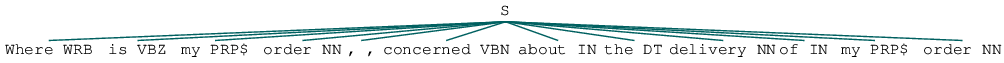

In [17]:

sentence = "Where is my order, concerned about the delivery of my order"
 
chunk = ne_chunk(pos_tag(word_tokenize(sentence)))
chunk

In [18]:
from collections import defaultdict

tech = ["order placed", "tech", "issue", "coupon", "item"]
ops = ["delivery", "measurement", "pickup", "refund"]
product = ["site content", "content not available", "error at site", "site not loading"]

def nltk_entities(review_texts=None):
    """
    Extract entities using the NLTK named entity chunker.
    """
    results = defaultdict(lambda: defaultdict(list))
    #fileids = fileids or corpus.fileids()

    for count, review in enumerate(review_texts):
        #print(review)
        #import pdb;pdb.set_trace()
#         if section is not None:
#             text = nltk.pos_tag(nltk.word_tokenize(list(sectpull([fileid],section=section))[0][1]))
#         else:
#             text = nltk.pos_tag(corpus.words(fileid))
#         text =  pos_tag(review)
#         print(text)
        for entity in ne_chunk(pos_tag(word_tokenize(review))):
            
            if isinstance(entity, tree.Tree):
                etext = " ".join([word for word, tag in entity.leaves()])
                print(entity.leaves())
                label = entity.label()
            else:
                continue
            #print(entity)
            if label == 'PERSON':
                key = 'persons'
            elif label == 'ORGANIZATION':
                key = 'organizations'
            elif label == 'LOCATION':
                key = 'locations'
            elif label == 'GPE':
                key = 'other'
            elif label in tech:
                key = 'tech'
            elif label in ops:
                key = 'ops'
            elif label in product:
                key = 'product'
            
            else:
                key = None
                
            #print("________",label)
            
            if key:
                results[count][key].append(etext)

    return results


review_text_list = ["Mark and John are working at Google." , "Awesome collection in Flyrobe", "Where is my order, concerned about the delivery of my order"] 
nltkents = nltk_entities(review_text_list)

[('Mark', 'NNP')]
[('John', 'NNP')]
[('Google', 'NNP')]
[('Awesome', 'NNP')]
[('Flyrobe', 'NNP')]


In [19]:
nltkents

defaultdict(<function __main__.nltk_entities.<locals>.<lambda>>,
            {0: defaultdict(list,
                         {'organizations': ['Google'],
                          'persons': ['Mark', 'John']}),
             1: defaultdict(list, {'other': ['Awesome', 'Flyrobe']})})